In [6]:
import pandas as pd

df = pd.read_excel("Restauarant dataset (2).xlsx")
len(df)


35424

In [5]:
df.head()

,Name,Website,Restaurante,City,Rating,Review
0,Bookistan5,Happy Cow,BJ's Restaurant & Brewhouse,Folsom,4,We went with a group of friends after an event...
1,MicheleJacka,Happy Cow,BJ's Restaurant & Brewhouse,Folsom,3,This restaurant was in a great urban location ...
2,P318i,Happy Cow,BJ's Restaurant & Brewhouse,Folsom,5,I found this restaurant by accident during a w...
3,suttercreek,Happy Cow,BJ's Restaurant & Brewhouse,Folsom,3,Usually we love Zare. A full dinner or just st...
4,Marty_Darte,Happy Cow,BJ's Restaurant & Brewhouse,Folsom,4,We shared two appetizers ( the bone marrow and...


In [8]:
unique_rating_counts = df['Rating'].value_counts()

print("Count of unique elements in the 'Rating' column after dropping empty values:")
print(unique_rating_counts)


Count of unique elements in the 'Rating' column after dropping empty values:
5    21682
4     7989
3     3102
1     1349
2     1300
Name: Rating, dtype: int64


In [9]:


df = df[df['Rating'].isin([1, 2, 3, 4, 5])]




In [4]:
# Convert 'Rating' column to integer type
df['Rating'] = df['Rating'].astype(int)


In [5]:


unique_rating_values = df['Rating'].unique()

print("Unique values in the 'Rating' column after filtering:")
print(unique_rating_values)




Unique values in the 'Rating' column after filtering:
[4 3 5 2 1]


In [6]:
# Get count of unique elements in the 'Rating' column
unique_rating_counts = df['Rating'].value_counts()

print("Count of unique elements in the 'Rating' column after dropping empty values:")
print(unique_rating_counts)

Count of unique elements in the 'Rating' column after dropping empty values:
5    21682
4     7989
3     3102
1     1349
2     1300
Name: Rating, dtype: int64


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import pickle
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string



In [16]:
df['Review'][0]

'We went with a group of friends after an event and it was a great place for a light meal. The bar menu is small but very adequate, with an emphasis on healthy, Mediterranean style dishes. They make a mean Mai Tai! A great choice if you are in the neighborhood. '

In [14]:
    tokens = word_tokenize(df['Review'][0])
    
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]
    tokens_no_stopwords = [word for word in tokens if word.lower() not in stop_words]
    

    tokens = [word for word in tokens if word not in string.punctuation]
    tokens_no_punctuation = [word for word in tokens if word not in string.punctuation]
    
    # Join tokens back into a single string
    preprocessed_text = ' '.join(tokens)
    
   # return preprocessed_text

In [18]:
tokens_no_stopwords

['went',
 'group',
 'friends',
 'event',
 'great',
 'place',
 'light',
 'meal',
 '.',
 'bar',
 'menu',
 'small',
 'adequate',
 ',',
 'emphasis',
 'healthy',
 ',',
 'Mediterranean',
 'style',
 'dishes',
 '.',
 'make',
 'mean',
 'Mai',
 'Tai',
 '!',
 'great',
 'choice',
 'neighborhood',
 '.']

In [19]:
tokens_no_punctuation

['went',
 'group',
 'friends',
 'event',
 'great',
 'place',
 'light',
 'meal',
 'bar',
 'menu',
 'small',
 'adequate',
 'emphasis',
 'healthy',
 'Mediterranean',
 'style',
 'dishes',
 'make',
 'mean',
 'Mai',
 'Tai',
 'great',
 'choice',
 'neighborhood']

In [20]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [21]:
preprocessed_text 

'went group friends event great place light meal bar menu small adequate emphasis healthy Mediterranean style dishes make mean Mai Tai great choice neighborhood'

In [10]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from bs4 import BeautifulSoup
import contractions
import string
import re
from autocorrect import Speller



# Sample text data
text = df['Review'][0]

# Tokenization
tokens = word_tokenize(text)

# Remove stopwords
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word.lower() not in stop_words]

# Remove punctuation
tokens = [word for word in tokens if word not in string.punctuation]


tokens = [word.lower() for word in tokens]
tokens_lowercasing =tokens = [word.lower() for word in tokens]


stemmer = PorterStemmer()
tokens = [stemmer.stem(word) for word in tokens]
tokens_Stemming=[stemmer.stem(word) for word in tokens]


lemmatizer = WordNetLemmatizer()
tokens = [lemmatizer.lemmatize(word) for word in tokens]
tokens_lemmatization=[lemmatizer.lemmatize(word) for word in tokens]

# Join tokens back into a single string
preprocessed_text = ' '.join(tokens)

preprocessed_text= contractions.fix(preprocessed_text)
preprocessed_text_contractions=contractions.fix(preprocessed_text)

# Remove numbers
preprocessed_text= re.sub(r'\d+', '', preprocessed_text)

# Remove HTML tags
preprocessed_text = BeautifulSoup(preprocessed_text, 'html.parser').get_text()

# Remove special characters
preprocessed_text = re.sub(r'\W', ' ',preprocessed_text)

# Remove extra whitespace
preprocessed_text = ' '.join(preprocessed_text.split())

# Spell checking
spell = Speller(lang='en')
preprocessed_text = spell(preprocessed_text)




In [18]:
preprocessed_text

'went group friends event great place light meal bar menu small adequate emphasis healthy Mediterranean style dishes make mean Mai Tai great choice neighborhood'

In [16]:
tokens_lemmatization

['went',
 'group',
 'friend',
 'event',
 'great',
 'place',
 'light',
 'meal',
 'bar',
 'menu',
 'small',
 'adequ',
 'emphasi',
 'healthi',
 'mediterranean',
 'style',
 'dish',
 'make',
 'mean',
 'mai',
 'tai',
 'great',
 'choic',
 'neighborhood']

In [23]:
preprocessed_text

'went group friend event great place light meal bar menu small ade emphasis health mediterranean style dish make mean mai tai great choice neighborhood'

In [24]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from bs4 import BeautifulSoup
import contractions
import string
import re
from autocorrect import Speller

def  preprocess_text(text):

                # Sample text data
                text = df['Review'][0]

                # Tokenization
                tokens = word_tokenize(text)

                # Remove stopwords
                stop_words = set(stopwords.words('english'))
                tokens = [word for word in tokens if word.lower() not in stop_words]

                # Remove punctuation
                tokens = [word for word in tokens if word not in string.punctuation]

                # Lowercasing
                tokens = [word.lower() for word in tokens]

                # Stemming
                stemmer = PorterStemmer()
                tokens = [stemmer.stem(word) for word in tokens]

                # Lemmatization
                lemmatizer = WordNetLemmatizer()
                tokens = [lemmatizer.lemmatize(word) for word in tokens]

                # Join tokens back into a single string
                preprocessed_text = ' '.join(tokens)

                # Expand contractions
                preprocessed_text= contractions.fix(preprocessed_text)

                # Remove numbers
                preprocessed_text= re.sub(r'\d+', '', preprocessed_text)

                # Remove HTML tags
                preprocessed_text = BeautifulSoup(preprocessed_text, 'html.parser').get_text()

                # Remove special characters
                preprocessed_text = re.sub(r'\W', ' ',preprocessed_text)

                # Remove extra whitespace
                preprocessed_text = ' '.join(preprocessed_text.split())

                # Spell checking
                spell = Speller(lang='en')
                preprocessed_text = spell(preprocessed_text)
                
                return preprocessed_text




In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer




In [26]:
from tqdm import tqdm

In [ ]:
tqdm.pandas(desc="Preprocessing")
df['Cleaned_Review'] = df['Review'].progress_apply(preprocess_text)

Preprocessing:  52%|█████▏    | 18256/35422 [29:55<23:53, 11.98it/s]  

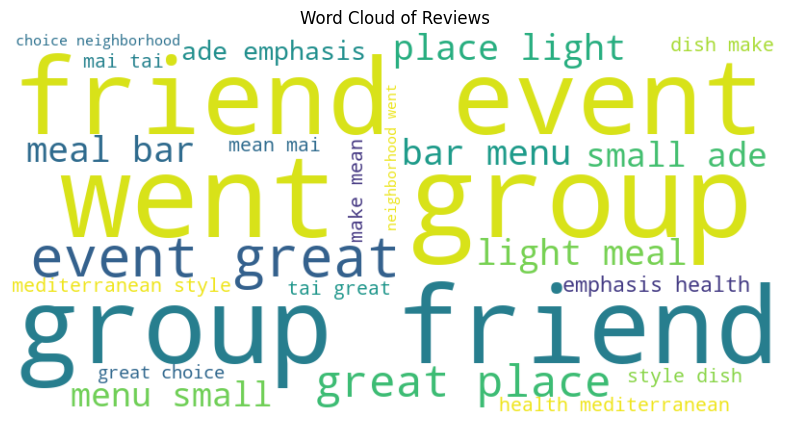

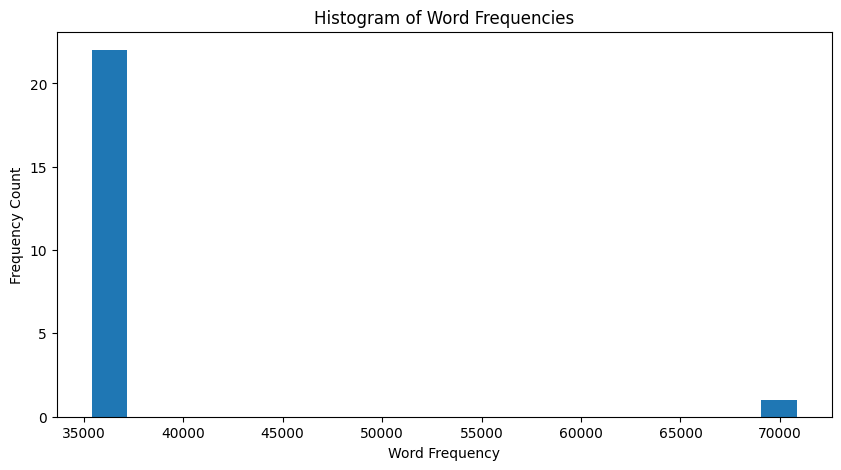

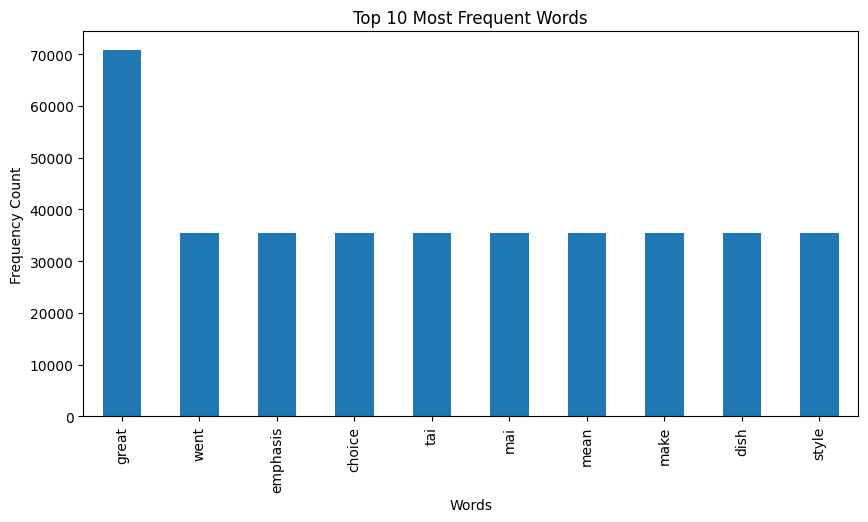

In [21]:

all_reviews = ' '.join(df['Cleaned_Review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()


all_words = ' '.join(df['Cleaned_Review']).split()
word_freq = pd.Series(all_words).value_counts()
plt.figure(figsize=(10, 5))
word_freq.plot(kind='hist', bins=20)
plt.title('Histogram of Word Frequencies')
plt.xlabel('Word Frequency')
plt.ylabel('Frequency Count')
plt.show()


top_n = 10
top_words = word_freq.head(top_n)
plt.figure(figsize=(10, 5))
top_words.plot(kind='bar')
plt.title(f'Top {top_n} Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency Count')
plt.show()


In [22]:
df.to_csv("preprocessed_dataset.csv")
